## Pandas

In [1]:
import pandas as pd

In [2]:
dates=pd.date_range('2023-01-01','2023-01-10')
dates

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')

In [3]:
tmp1 = pd.Series([67, 98, 100, 88, 77 ,79, 83, 96, 92, 80], index=dates)
tmp1

2023-01-01     67
2023-01-02     98
2023-01-03    100
2023-01-04     88
2023-01-05     77
2023-01-06     79
2023-01-07     83
2023-01-08     96
2023-01-09     92
2023-01-10     80
Freq: D, dtype: int64

In [4]:
import numpy as np

In [5]:
tmp2=pd.Series(np.random.randint(60,100,size=10), index=dates)
tmp2

2023-01-01    85
2023-01-02    83
2023-01-03    97
2023-01-04    78
2023-01-05    95
2023-01-06    88
2023-01-07    83
2023-01-08    91
2023-01-09    83
2023-01-10    61
Freq: D, dtype: int64

In [6]:
exam=pd.DataFrame({'Math':tmp1,
                  'English':tmp2})
exam

,Math,English
2023-01-01,67,85
2023-01-02,98,83
2023-01-03,100,97
2023-01-04,88,78
2023-01-05,77,95
2023-01-06,79,88
2023-01-07,83,83
2023-01-08,96,91
2023-01-09,92,83
2023-01-10,80,61


In [7]:
exam.Math

2023-01-01     67
2023-01-02     98
2023-01-03    100
2023-01-04     88
2023-01-05     77
2023-01-06     79
2023-01-07     83
2023-01-08     96
2023-01-09     92
2023-01-10     80
Freq: D, Name: Math, dtype: int64

In [8]:
exam['Math']

2023-01-01     67
2023-01-02     98
2023-01-03    100
2023-01-04     88
2023-01-05     77
2023-01-06     79
2023-01-07     83
2023-01-08     96
2023-01-09     92
2023-01-10     80
Freq: D, Name: Math, dtype: int64

In [9]:
exam.loc['2023-01-04', 'English']
#파라미터 2개, 행열

78

In [10]:
exam.iloc[-1, 0]
#iloc은 파라미터에 숫자만 올 수 있음

80

In [11]:
exam['Average']=(exam.Math+exam.English)/2

In [12]:
exam.drop('Average', axis=1, inplace=True)
#세로는 1, 가로는 0
#inplace: 영원히 지울건지

In [13]:
exam["Average"]=np.mean(exam, axis=1)
exam

,Math,English,Average
2023-01-01,67,85,76.0
2023-01-02,98,83,90.5
2023-01-03,100,97,98.5
2023-01-04,88,78,83.0
2023-01-05,77,95,86.0
2023-01-06,79,88,83.5
2023-01-07,83,83,83.0
2023-01-08,96,91,93.5
2023-01-09,92,83,87.5
2023-01-10,80,61,70.5


> **Q. 2023-01-02 이전과 2023-01-09 이후의 시험성적만 보여주세요**

In [14]:
exam.loc[(exam.index<='2023-01-02')|(exam.index>='2023-01-09')]

,Math,English,Average
2023-01-01,67,85,76.0
2023-01-02,98,83,90.5
2023-01-09,92,83,87.5
2023-01-10,80,61,70.5


> **Q. 평균점수가 85점 이상인 날짜의 영어점수 데이터만 보여주세요**

In [15]:
exam.loc[exam.Average>=85, 'English']

2023-01-02    83
2023-01-03    97
2023-01-05    95
2023-01-08    91
2023-01-09    83
Name: English, dtype: int64

In [16]:
exam[exam.Average>=85].English
#명령어. 은 특정 행만 보여줌

2023-01-02    83
2023-01-03    97
2023-01-05    95
2023-01-08    91
2023-01-09    83
Name: English, dtype: int64

> **Q. 2023-01-05 이후 수학점수가 80점 이상인 데이터만 보여주세요**

<AxesSubplot:title={'center':'Exam Score'}>

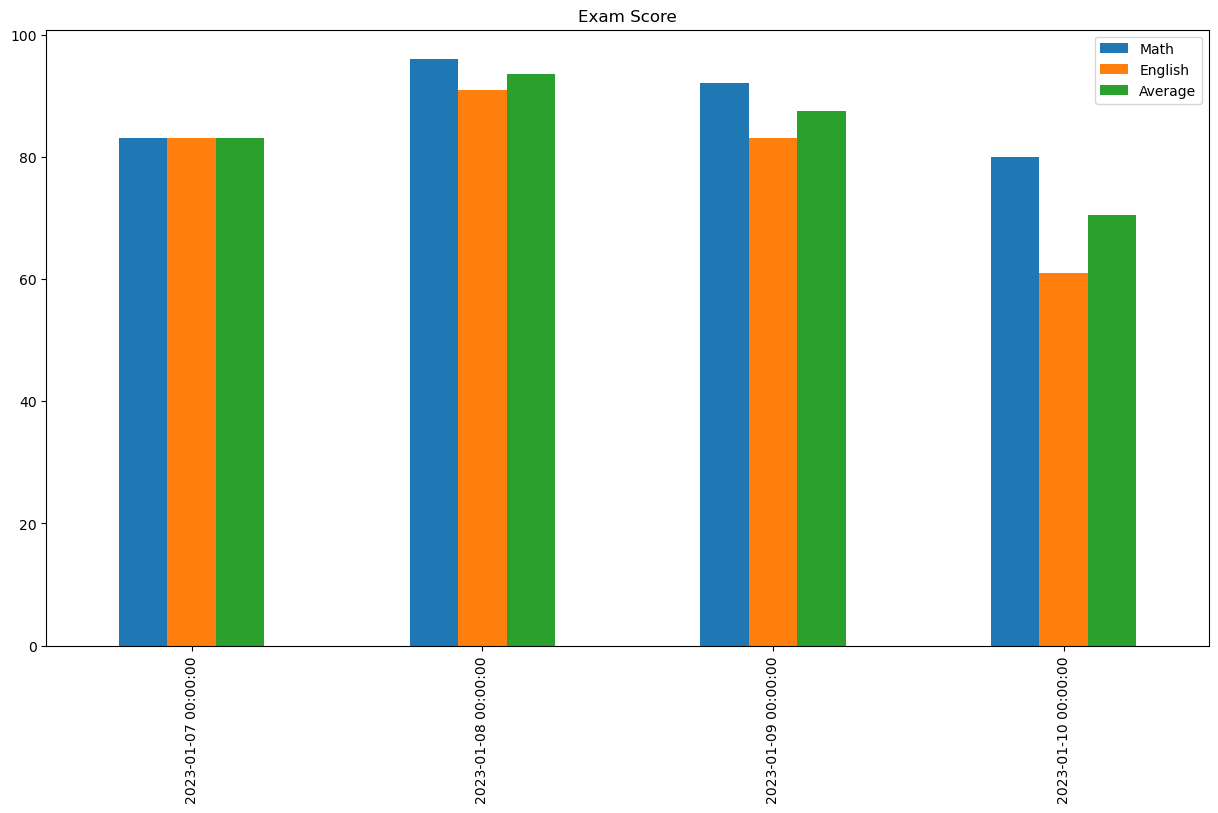

In [17]:
exam.loc[(exam.index>'2023-01-05')&(exam.Math>=80)].plot(kind='bar',figsize=(15,8), title='Exam Score')
#exam.loc['2023-01-05:'][exam.Math>=80]

## 영화 리뷰 데이터 분석

In [18]:
movies=pd.read_csv('http://bit.ly/imdbratings')
print(movies.shape)
movies.tail(10)
#데이터 용량이 클 때, 규모 파악하고 잘 불러왔는지 파악

(979, 6)


,star_rating,title,content_rating,genre,duration,actors_list
969,7.4,Law Abiding Citizen,R,Crime,109,"[u'Gerard Butler', u'Jamie Foxx', u'Leslie Bibb']"
970,7.4,Wonder Boys,R,Drama,107,"[u'Michael Douglas', u'Tobey Maguire', u'Franc..."
971,7.4,Death at a Funeral,R,Comedy,90,"[u'Matthew Macfadyen', u'Peter Dinklage', u'Ew..."
972,7.4,Blue Valentine,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John..."
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."
978,7.4,Wall Street,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar..."


In [19]:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [20]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


> **Q. 영화 상영시간이 200분 이상인 영화들이 장르별로 몇 개씩 있는지 알려주세요**

In [21]:
movies[movies.duration>=200].genre.value_counts()

Adventure    5
Drama        3
Crime        2
Biography    1
Action       1
Name: genre, dtype: int64

In [33]:
movies[(movies.duration>=200)&(movies.genre=='Adventure')].star_rating.mean()

8.32

> **Q. 영화 장르가 Adventure, Drama, Crime인 영화를 찾고 총 몇개씩인지 알려주세요**

In [27]:
movies.loc[(movies.genre=='Adventure')|(movies.genre=='Drama')|(movies.genre=='Crime')].genre.value_counts()
#movies[movies.genre.isin(['Crime','Adventure','Drama'])].genre.value_count()

Drama        278
Crime        124
Adventure     75
Name: genre, dtype: int64

> **Q. 영화의 각 장르별 평균 평점을 구해주세요**

In [39]:
movies.groupby('genre').star_rating.mean().sort_values(ascending=False)

genre
Western      8.255556
Film-Noir    8.033333
History      8.000000
Mystery      7.975000
Adventure    7.933333
Sci-Fi       7.920000
Crime        7.916935
Animation    7.914516
Drama        7.902518
Action       7.884559
Biography    7.862338
Family       7.850000
Comedy       7.822436
Horror       7.806897
Fantasy      7.700000
Thriller     7.680000
Name: star_rating, dtype: float64

## 주식 데이터 분석

In [40]:
!pip install pandas-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 5.8 MB/s eta 0:00:00


In [42]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 10.6 MB/s eta 0:00:0000:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


In [43]:
pip install jupyterthemes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 5.9 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.6 MB/s eta 0:00:00


Note: you may need to restart the kernel to use updated packages.


In [1]:
from pandas_datareader import data

In [3]:
import yfinance

In [5]:
yfinance.pdr_override()

In [7]:
samsung=data.get_data_yahoo('005930.KS', start='2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [9]:
samsung.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,81000.0,84400.0,80200.0,83000.0,79551.828125,38655276
2021-01-05,81600.0,83900.0,81600.0,83900.0,80414.453125,35335669
2021-01-06,83300.0,84500.0,82100.0,82200.0,78785.078125,42089013
2021-01-07,82800.0,84200.0,82700.0,82900.0,79455.992188,32644642
2021-01-08,83300.0,90000.0,83000.0,88800.0,85110.875000,59013307


In [10]:
samsung.High.max()

96800.0

In [11]:
samsung.Low.min()

51800.0

> **Q. 최고가를 찍었던 날짜는?**

In [16]:
samsung.loc[samsung.High==96800]
#samsung[samsung.High==samsung.High.max()].index

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-11,90000.0,96800.0,89500.0,91000.0,87219.476562,90306177


In [18]:
samsung['증가량']=samsung.Volume.diff()

In [22]:
samsung['증가율']=round((samsung.증가량 / (samsung.Volume-samsung.증가량))*100, 2)
samsung

,Open,High,Low,Close,Adj Close,Volume,증가량,증가율
Date,,,,,,,,
2021-01-04,81000.0,84400.0,80200.0,83000.0,79551.828125,38655276,NaN,NaN
2021-01-05,81600.0,83900.0,81600.0,83900.0,80414.453125,35335669,-3319607.0,-8.59
2021-01-06,83300.0,84500.0,82100.0,82200.0,78785.078125,42089013,6753344.0,19.11
2021-01-07,82800.0,84200.0,82700.0,82900.0,79455.992188,32644642,-9444371.0,-22.44
2021-01-08,83300.0,90000.0,83000.0,88800.0,85110.875000,59013307,26368665.0,80.77
...,...,...,...,...,...,...,...,...
2023-03-23,60600.0,62300.0,60600.0,62300.0,62300.000000,15381057,6402466.0,71.31
2023-03-24,62700.0,63300.0,62300.0,63000.0,63000.000000,18278602,2897545.0,18.84
2023-03-27,62600.0,62800.0,62000.0,62100.0,62100.000000,11039331,-7239271.0,-39.61


In [23]:
# for문과 if문을 통해서 업무 자동화 만들기
# 새로운 리스트를 만들어서 .append로 추가하게 만들기
signal=[]
for row in samsung.증가율:
    if row > 40:
        signal.append("40%이상 증가함!!")
    elif row < -40:
        signal.append("40%이상 감소함!!")
    else:
        signal.append("이상없음!!")

In [25]:
samsung['signal']=signal

In [26]:
samsung

,Open,High,Low,Close,Adj Close,Volume,증가량,증가율,signal
Date,,,,,,,,,
2021-01-04,81000.0,84400.0,80200.0,83000.0,79551.828125,38655276,NaN,NaN,이상없음!!
2021-01-05,81600.0,83900.0,81600.0,83900.0,80414.453125,35335669,-3319607.0,-8.59,이상없음!!
2021-01-06,83300.0,84500.0,82100.0,82200.0,78785.078125,42089013,6753344.0,19.11,이상없음!!
2021-01-07,82800.0,84200.0,82700.0,82900.0,79455.992188,32644642,-9444371.0,-22.44,이상없음!!
2021-01-08,83300.0,90000.0,83000.0,88800.0,85110.875000,59013307,26368665.0,80.77,40%이상 증가함!!
...,...,...,...,...,...,...,...,...,...
2023-03-23,60600.0,62300.0,60600.0,62300.0,62300.000000,15381057,6402466.0,71.31,40%이상 증가함!!
2023-03-24,62700.0,63300.0,62300.0,63000.0,63000.000000,18278602,2897545.0,18.84,이상없음!!
2023-03-27,62600.0,62800.0,62000.0,62100.0,62100.000000,11039331,-7239271.0,-39.61,이상없음!!


In [27]:
samsung.signal.value_counts()
#samsung[abs(samsung.증가율)>=40].count()

이상없음!!         464
40%이상 증가함!!     62
40%이상 감소함!!     26
Name: signal, dtype: int64

In [36]:
samsung[samsung.증가량==samsung.증가량.max()]

,Open,High,Low,Close,Adj Close,Volume,증가량,증가율,signal
Date,,,,,,,,,
2021-01-11,90000.0,96800.0,89500.0,91000.0,87219.476562,90306177,31292870.0,53.03,40%이상 증가함!!


In [38]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Date'>

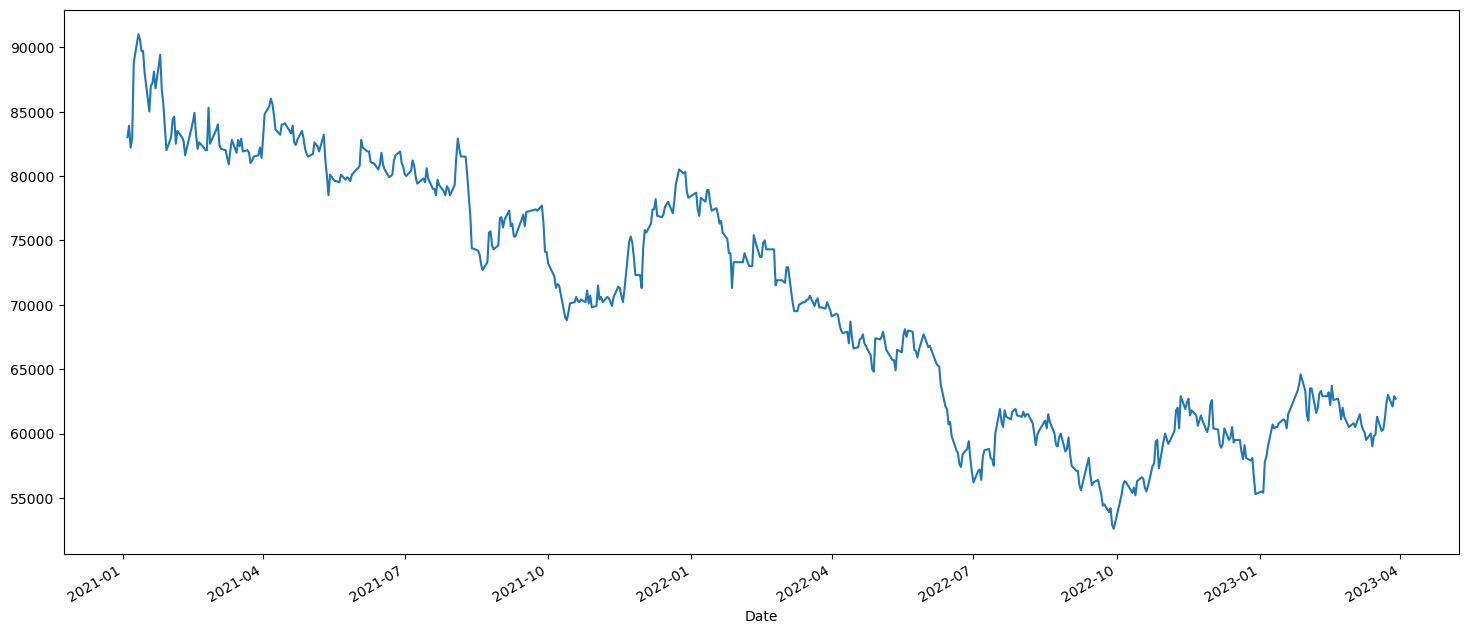

In [37]:
samsung.Close.plot(figsize=(18,8))